In [3]:
#imports
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [4]:
#load csv(s)

ratings = pd.read_csv("dataset/ratings.csv")
tags = pd.read_csv("dataset/tags.csv")
movies = pd.read_csv("dataset/movies.csv")
links = pd.read_csv("dataset/links.csv")

# Datframe Creation and Tranformations


In [5]:
ratings.drop('timestamp', axis =1, inplace=True)
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [6]:
tags.drop('timestamp', axis=1, inplace=True)
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
#statistics from df
print(f"Shape of ratings: {ratings.shape}")
print(f"Shape of tags: {tags.shape}")
print(f"Shape of movies: {movies.shape}")
print(f"Shape of links: {links.shape}")


Shape of ratings: (25000095, 3)
Shape of tags: (1093360, 3)
Shape of movies: (62423, 3)
Shape of links: (62423, 3)


In [10]:
print(f"Number of users who have rated movies: {ratings['userId'].nunique()}")

Number of users who have rated movies: 162541


In [11]:

movies['year'] = movies['title'].str.extract('\((\d{4})\)')

In [12]:
movies_rating = pd.merge(movies, ratings, on="movieId", how="inner")
movies_rating.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0


In [13]:
#movies throught the years
year_release = movies[movies['year'].notna()]['year'].value_counts().reset_index()
year_release.set_index('year', inplace=True)
year_release.sort_index(inplace=True, ascending=False)
print(year_release)




      count
year       
2019    994
2018   2034
2017   2374
2016   2488
2015   2513
...     ...
1887      1
1883      1
1880      1
1878      1
1874      1

[135 rows x 1 columns]


# Statistics and Plots

## basic statistics


In [12]:
n_users = movies_rating['userId'].nunique()
n_ratings = len(movies_rating['rating'])
n_movies = movies_rating['movieId'].nunique()
n_tags = len(tags['tag'])




print(f"NUmber of movies: {n_movies}")
print(f"Number of ratings: {n_ratings}")
print(f"Number of users: {n_users}")
print(f"Number of tags: {n_tags}")
print(f"Average Rating: {ratings['rating'].mean()}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Averahe number of rating sper movie: {round(n_ratings/n_movies, 2)}")







NUmber of movies: 59047
Number of ratings: 25000095
Number of users: 162541
Number of tags: 1093360
Average Rating: 3.533854451353085
Average number of ratings per user: 153.81
Averahe number of rating sper movie: 423.39


In [13]:
#verifying wether ratings are normaly distributed or skewed
# For example, using Shapiro-Wilk test
stat, p = sc.stats.shapiro(ratings['rating'])
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)

# You can interpret the p-value to determine if the data is normally distributed
if p > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not normally distributed.")   

Shapiro-Wilk Test Statistic: 0.8424462080001831
p-value: 0.0
The data is not normally distributed.


c:\Users\João\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


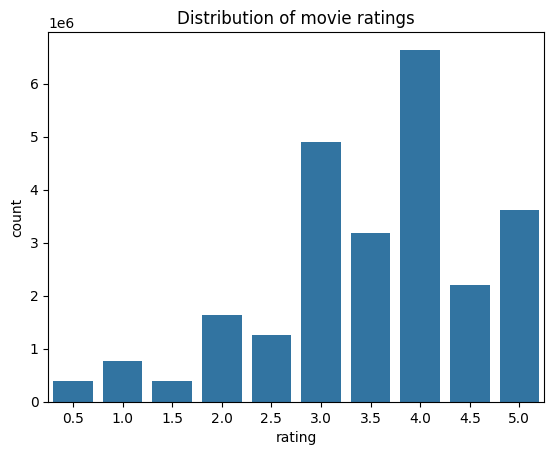

In [14]:
sns.countplot(x="rating", data=ratings)
plt.title("Distribution of movie ratings")
plt.show()

## Genre analysis

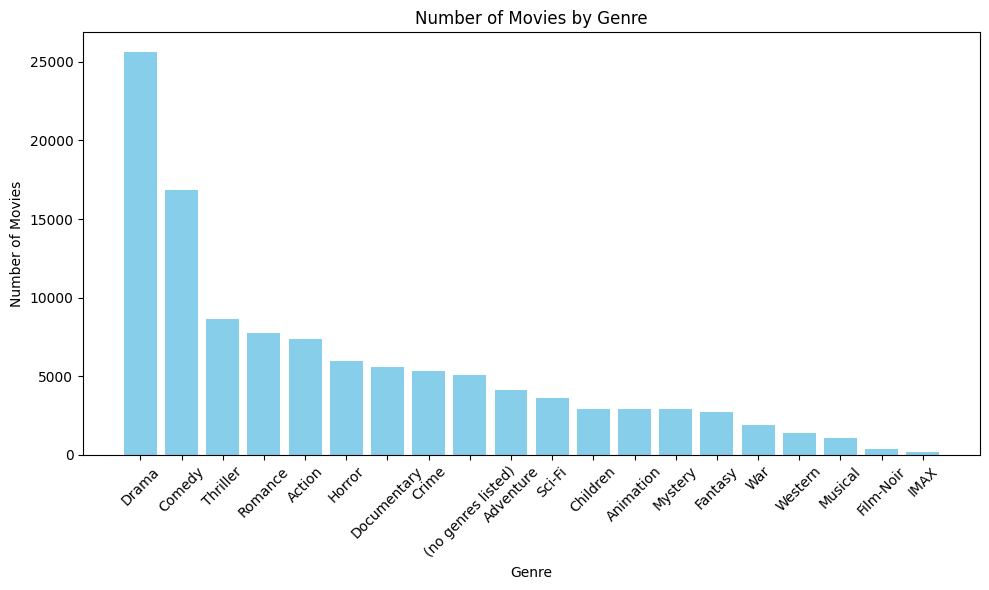

In [15]:
 
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_counts['Genre'], genre_counts['Count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# ratings by genre

#testing this with a subset of the data
subset_df = movies_rating#.iloc[:100000]
#print(subset_df)

genres_rating = subset_df[['movieId', 'genres', 'rating']].copy()

genres_rating['genres'] = genres_rating['genres'].str.split('|')

exploded_genres = genres_rating.explode('genres')

# Group by genre and calculate the average rating for each genre
genre_rating_stats = exploded_genres.groupby('genres').agg({'rating': 'mean'}).reset_index()

# Sort the DataFrame by average rating in descending order
genre_rating_stats = genre_rating_stats.sort_values(by='rating', ascending=False)
genre_rating_stats.rename(columns={'rating': 'Average_rating'}, inplace=True)

print(genre_rating_stats)





MemoryError: Unable to allocate 517. MiB for an array with shape (67809886, 1) and data type int64

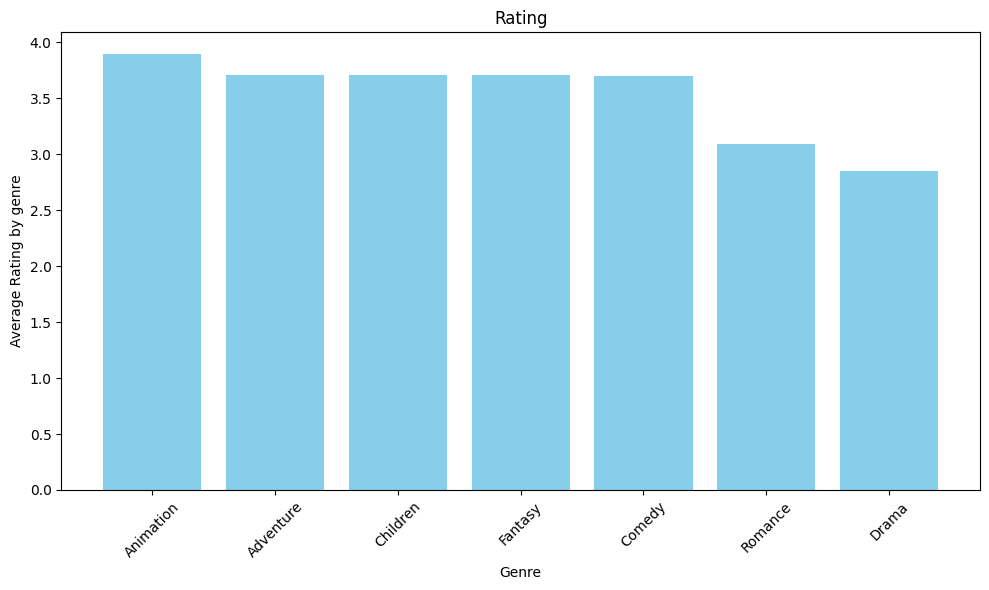

In [ ]:
# plotting rating by genres
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_rating_stats['genres'], genre_rating_stats['Average_rating'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating by genre')
plt.title('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Movie analysis

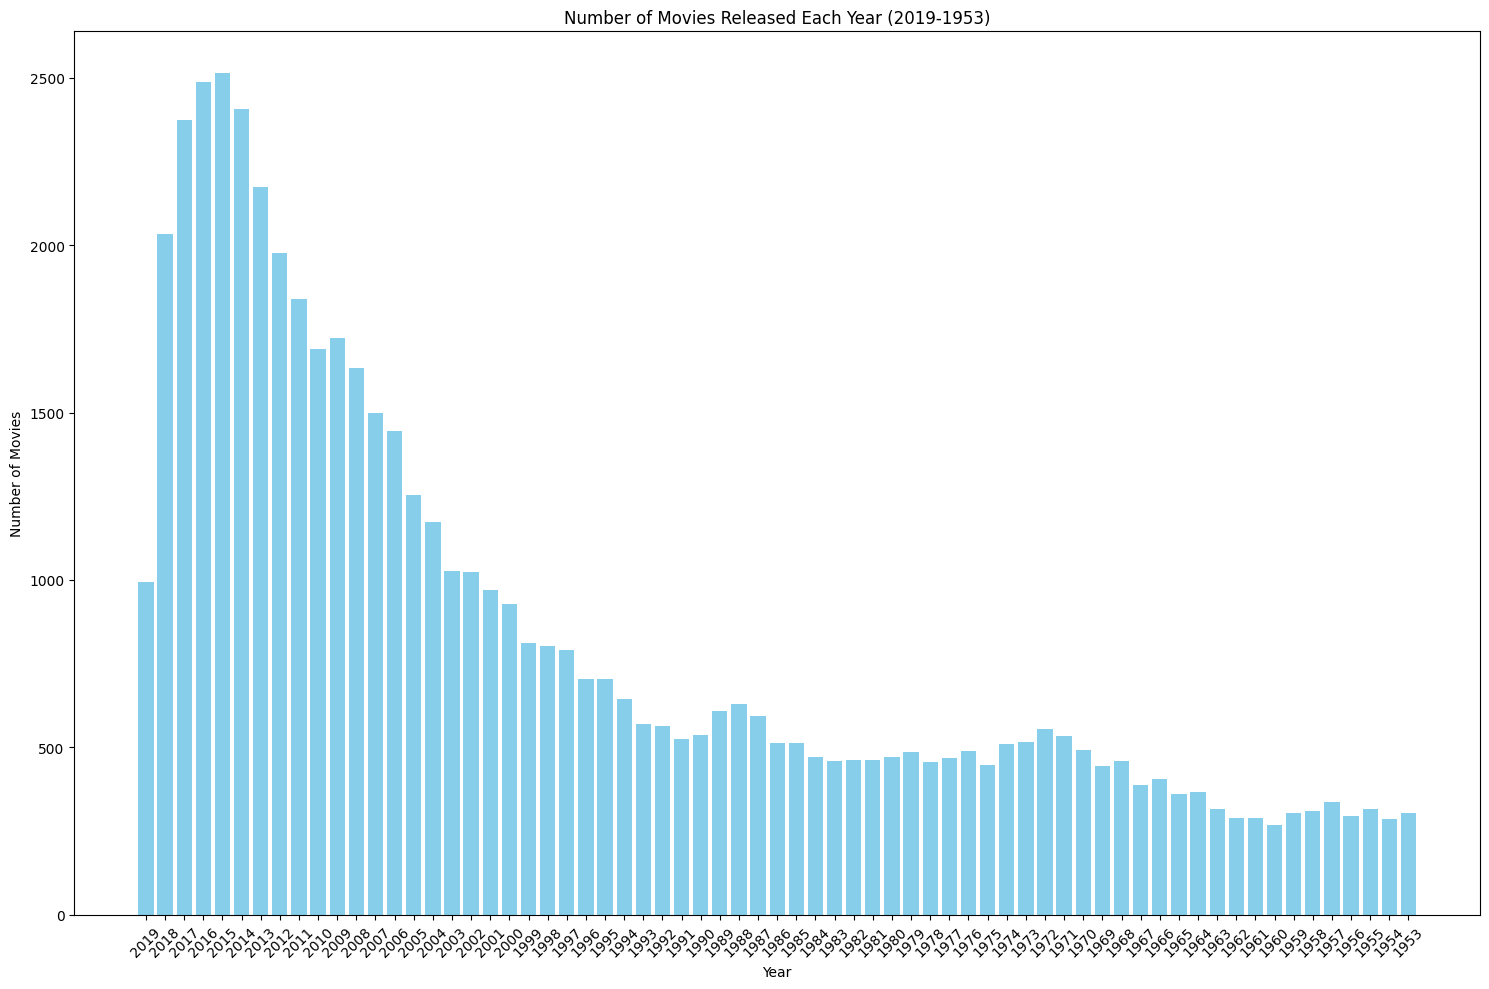

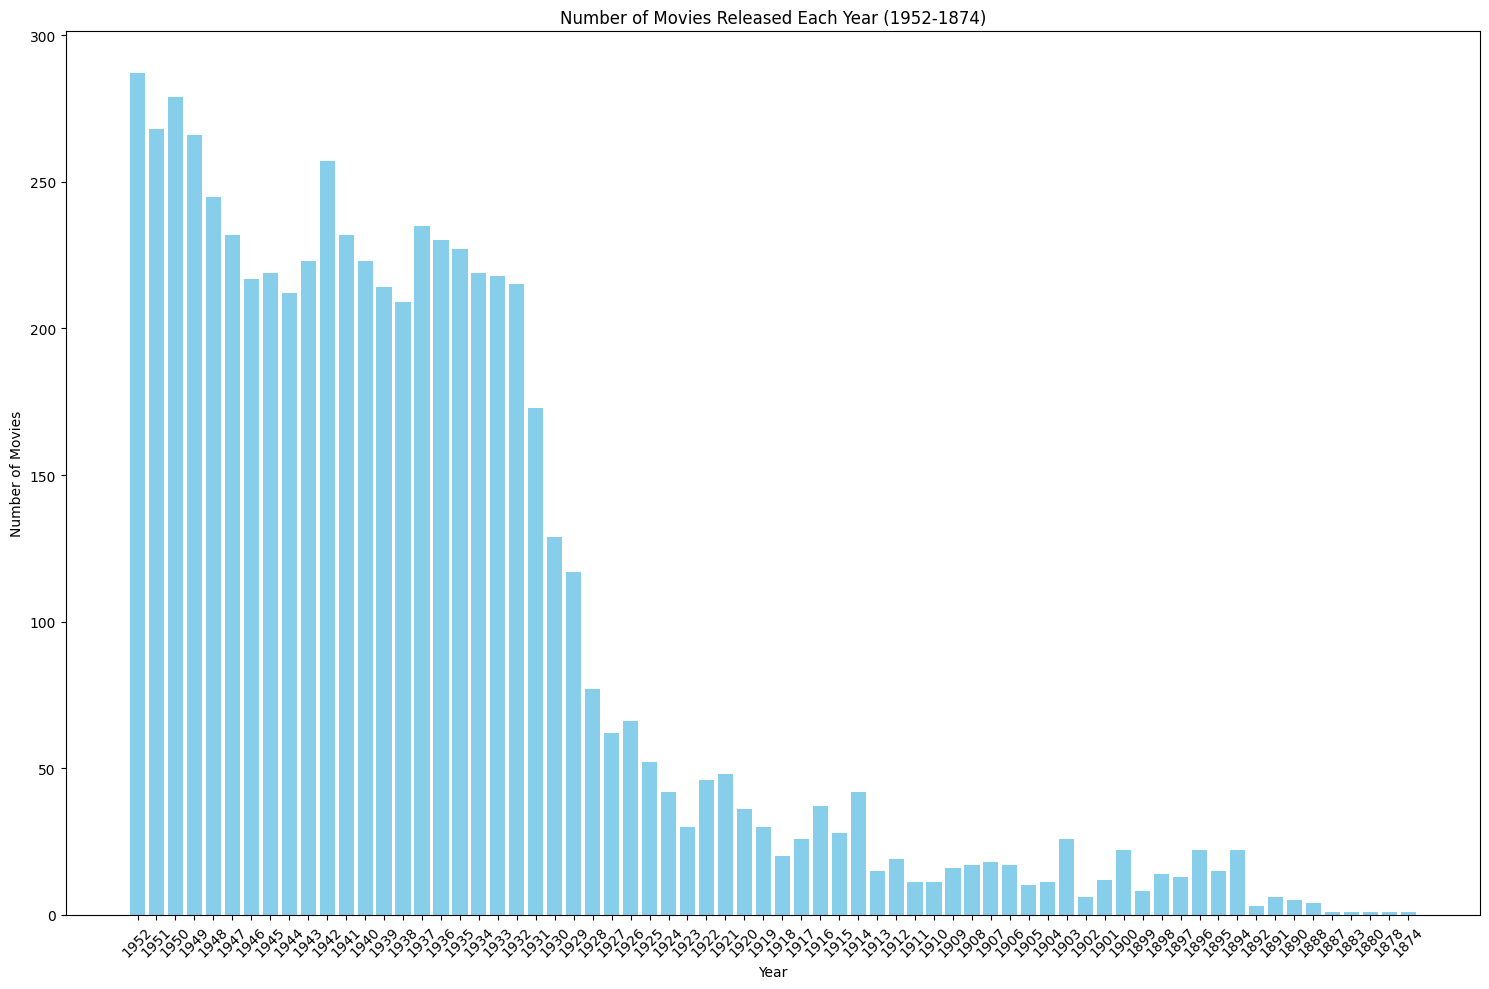

In [ ]:
x = len(year_release) // 2


plt.figure(figsize=(15, 10))
plt.bar( year_release.index[:x], year_release['count'][:x], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title(f"Number of Movies Released Each Year (2019-{2019-x+1})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar( year_release.index[x:], year_release['count'][x:], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title(f"Number of Movies Released Each Year ({2019-x}-1874)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
rating_distribution_movie = movies_rating.groupby(['movieId', 'title'])['rating'].value_counts().unstack(fill_value=0)
# print(rating_distribution_movie)

movies_rating_stats = movies_rating[['movieId', 'title', 'rating']].groupby(['movieId', 'title'])['rating'].agg(['count', 'mean']).round(1)
movies_rating_stats.sort_values('count', ascending=False, inplace=True)
movies_rating_stats.rename(columns={'count' : 'Num_ratings', 'mean': 'Average_rating'}, inplace=True)
movies_rating_stats.head(15)


def calculate_weighted_rating(df, C, m):
    """
    Calculate Bayesian weighted rating for each movie in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing movie ratings.
    C (float): Average rating across all movies (prior assumption).
    m (int): Minimum number of ratings required to be considered.

    Returns:
    DataFrame: DataFrame with Bayesian weighted rating column added.
    """
    
    # Add the Bayesian weighted rating as a new column in the DataFrame
    df['Bayesian_rating'] = (df['Num_ratings'] / (df['Num_ratings'] + m)) * df['Average_rating'] + (m / (df['Num_ratings'] + m)) * C

    return df

C = round(ratings['rating'].mean(), 2)
movies_rating_stats = calculate_weighted_rating(movies_rating_stats, C, 500)
movies_rating_stats.sort_values(by='Bayesian_rating', inplace=True, ascending=False)
movies_rating_stats.head()

,,Num_ratings,Average_rating,Bayesian_rating
movieId,title,,,
318,"Shawshank Redemption, The (1994)",81482,4.4,4.394694
50,"Usual Suspects, The (1995)",55366,4.3,4.293109
858,"Godfather, The (1972)",52498,4.3,4.292736
1221,"Godfather: Part II, The (1974)",34188,4.3,4.288901
159817,Planet Earth (2006),1747,4.5,4.284157


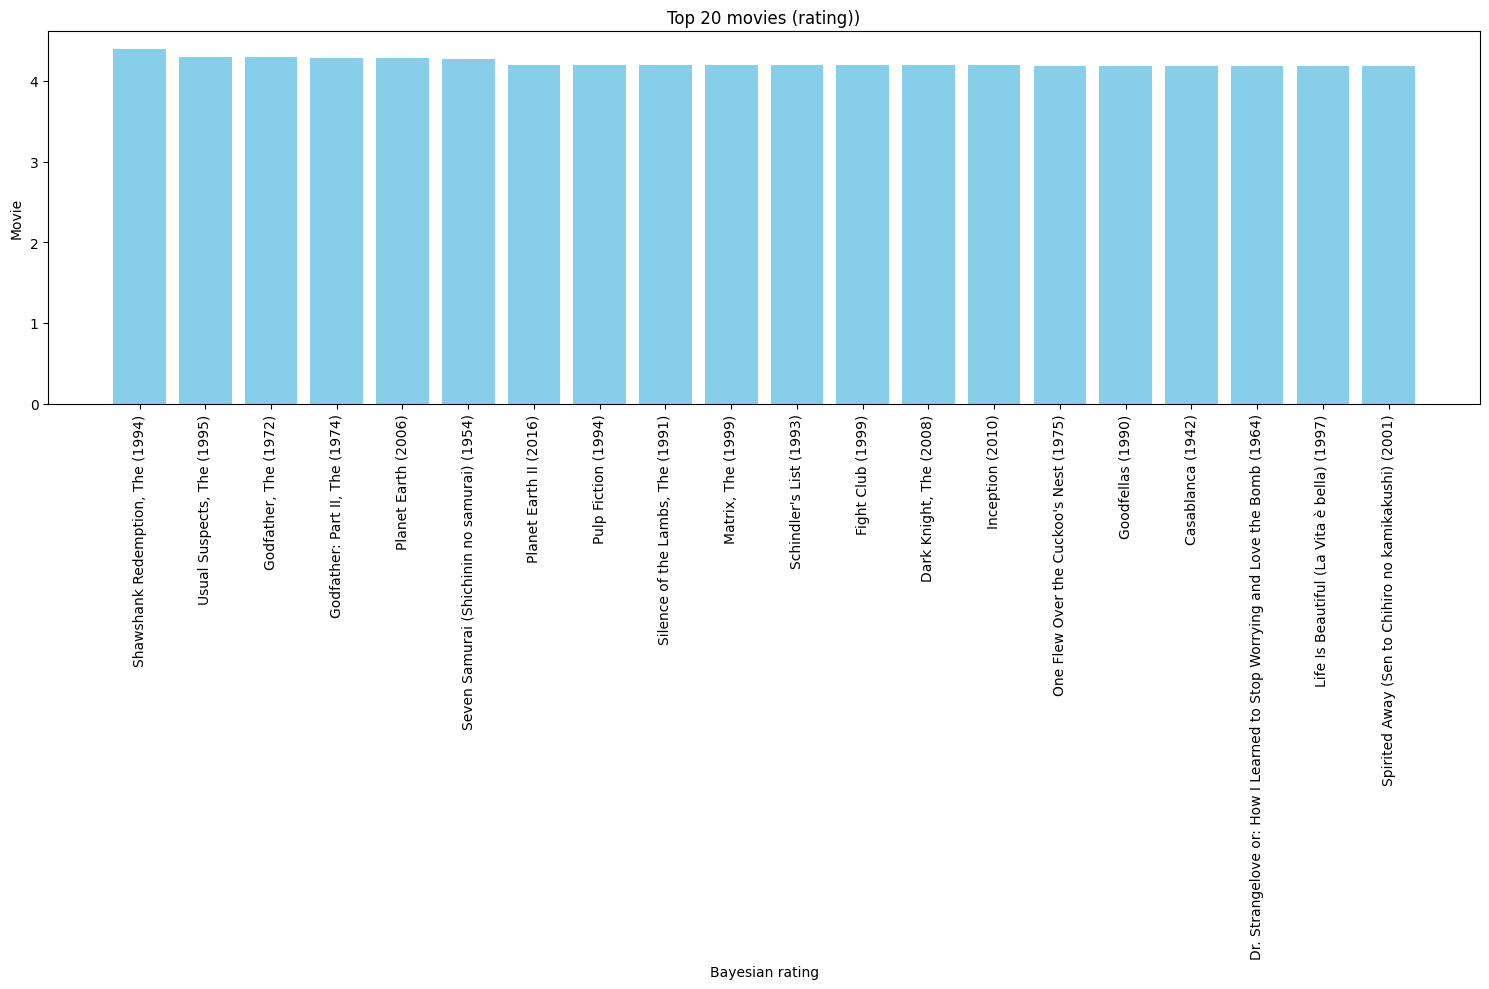

In [ ]:
x = 20

titles = [index[1] for index in movies_rating_stats.index[:x]]

plt.figure(figsize=(15, 10))
plt.bar( titles, movies_rating_stats['Bayesian_rating'][:x], color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title(f"Top {x} movies ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
if isinstance(movies_rating_stats.index, pd.MultiIndex):
    movies_rating_stats.reset_index(inplace=True)
movies_rating_stats['year'] = movies_rating_stats['title'].str.extract('\((\d{4})\)')
movies_ratings_years = movies_rating_stats[['year', 'Num_ratings' , 'Bayesian_rating']]
yearly_stats = movies_ratings_years.groupby('year').agg({'Num_ratings': 'sum', 'Bayesian_rating': 'mean'}).reset_index()

yearly_stats.set_index('year', inplace=True)
print(yearly_stats)


      Num_ratings  Bayesian_rating
year                              
1874           18         3.511583
1878           22         3.503448
1880            3         3.525050
1883           11         3.509980
1887           16         3.476357
...           ...              ...
2015       293923         3.515682
2016       230106         3.518497
2017       170529         3.519438
2018        98276         3.518815
2019        27540         3.517150

[135 rows x 2 columns]


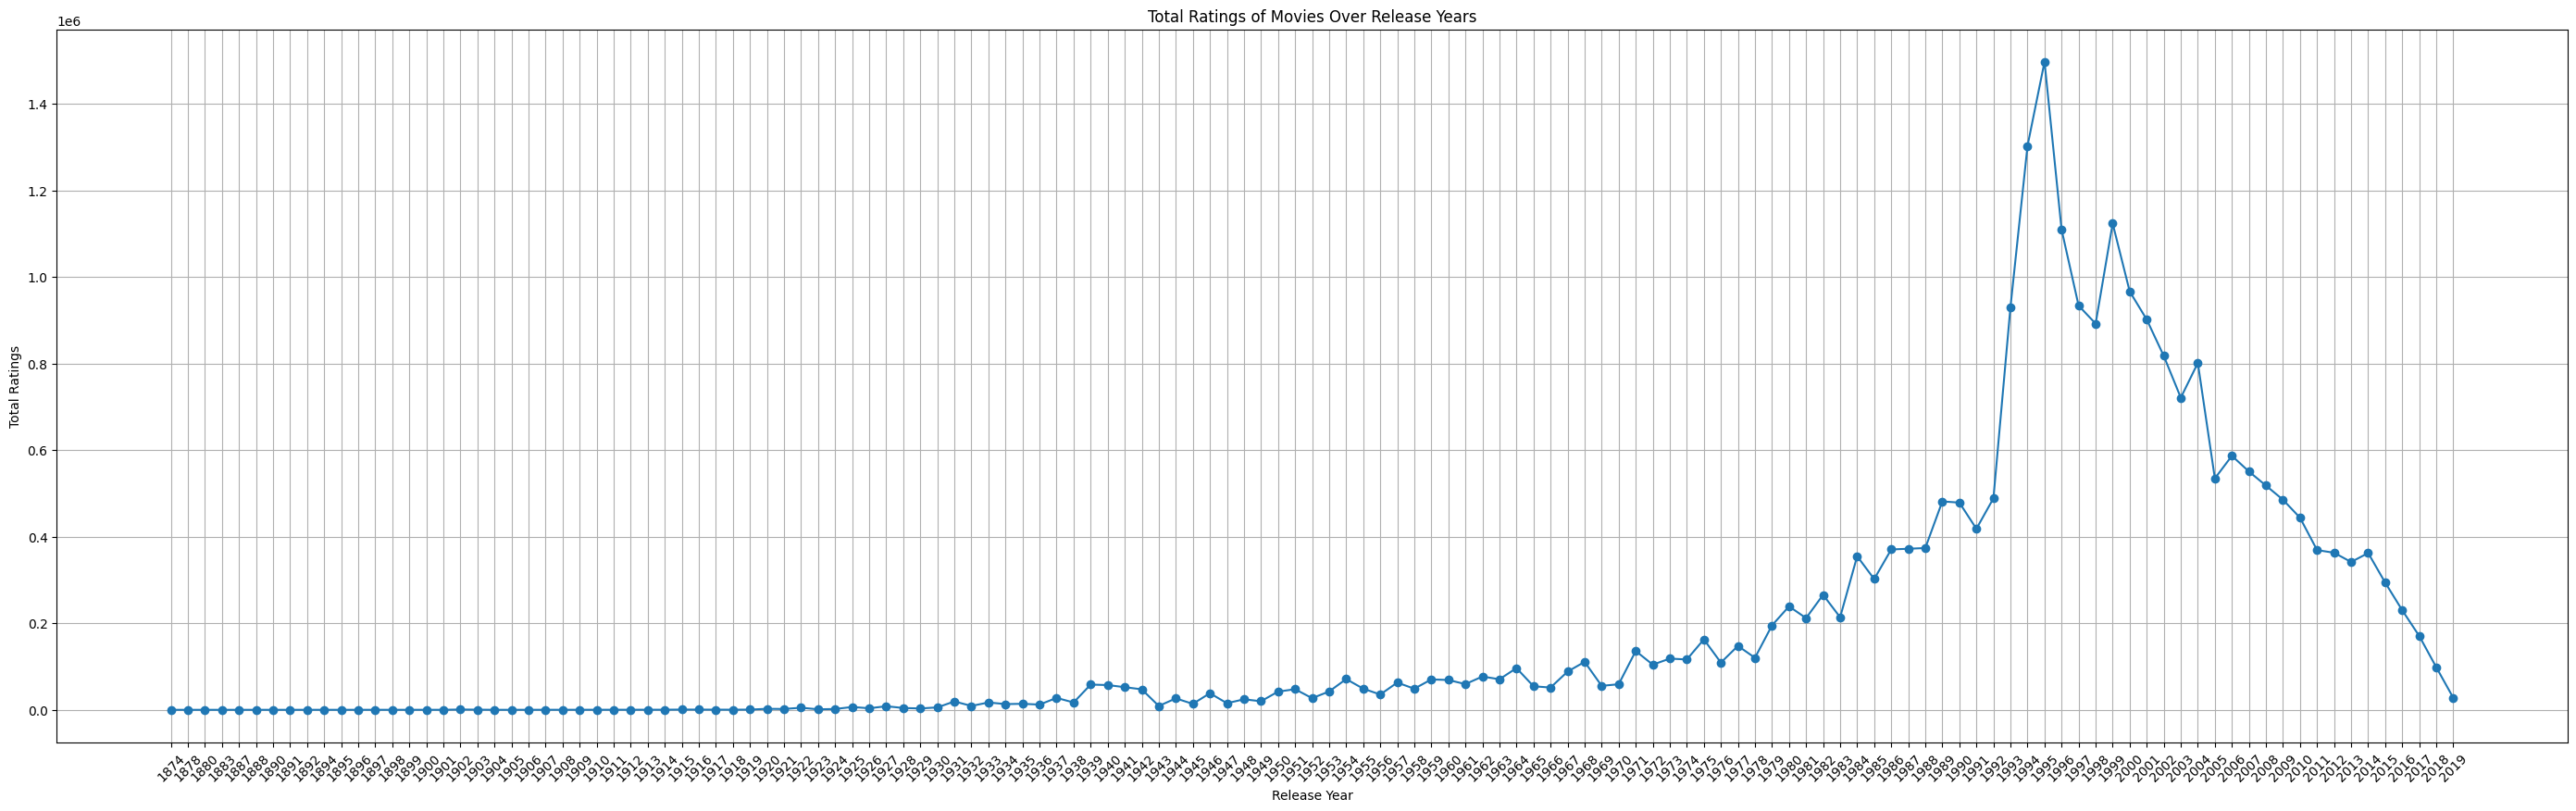

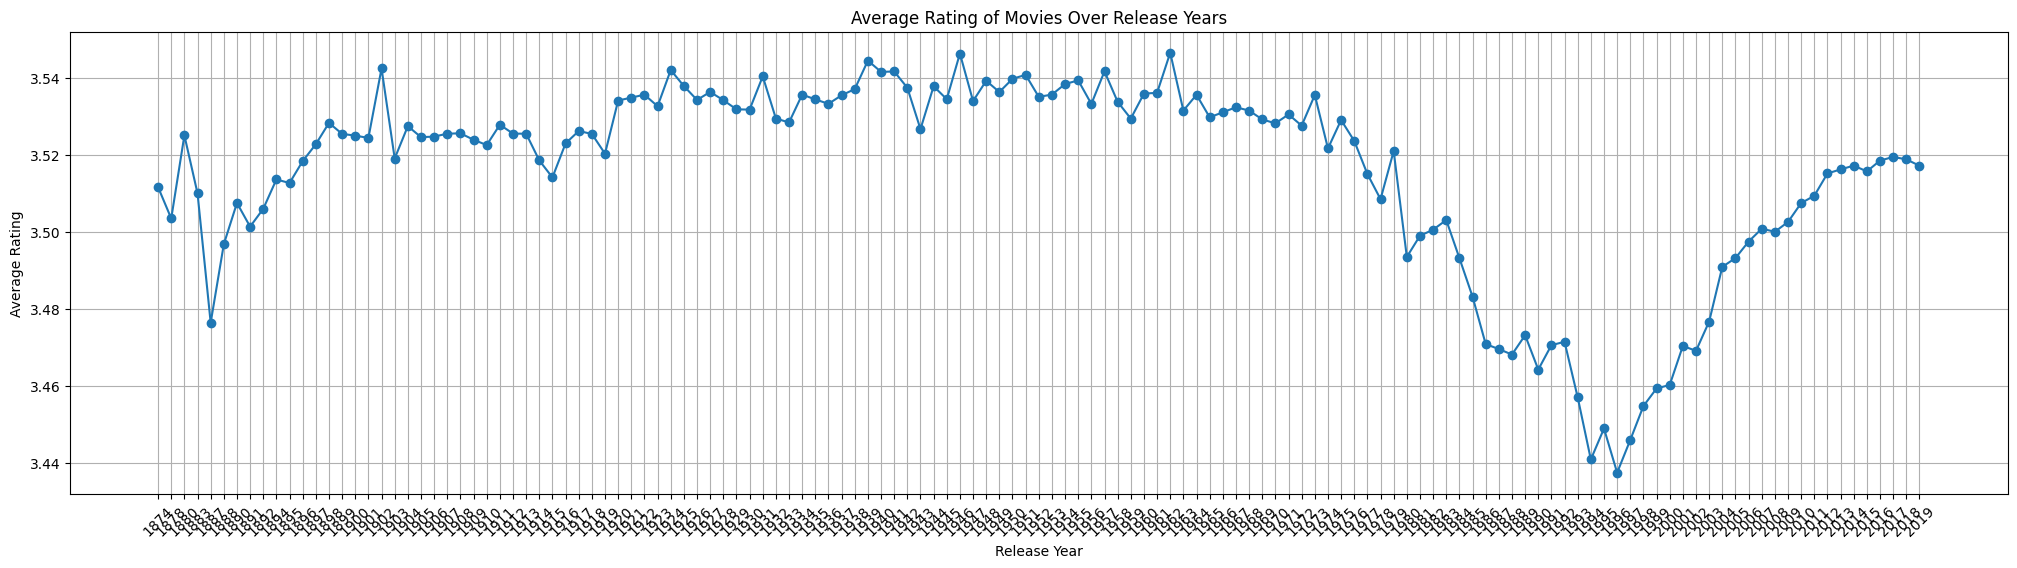

In [ ]:
# Plot the relationship between release year and total ratings
plt.figure(figsize=(35, 10))
plt.plot(yearly_stats.index, yearly_stats['Num_ratings'], marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Total Ratings')
plt.title('Total Ratings of Movies Over Release Years')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot the relationship between release year and average rating
plt.figure(figsize=(25, 6))
plt.plot(yearly_stats.index, yearly_stats['Bayesian_rating'], marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of Movies Over Release Years')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Tags analysis


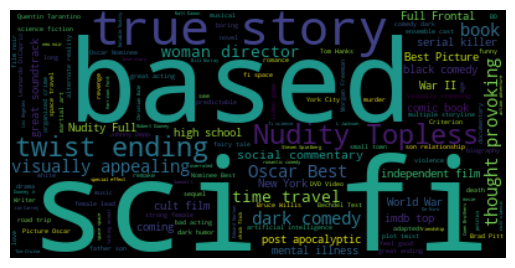

In [ ]:
#wordcloud for tags

tags_text = ' '.join(tags.loc[tags['tag'].notna(), 'tag'])
wordcloud = WordCloud().generate(tags_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Number of reviews given per users


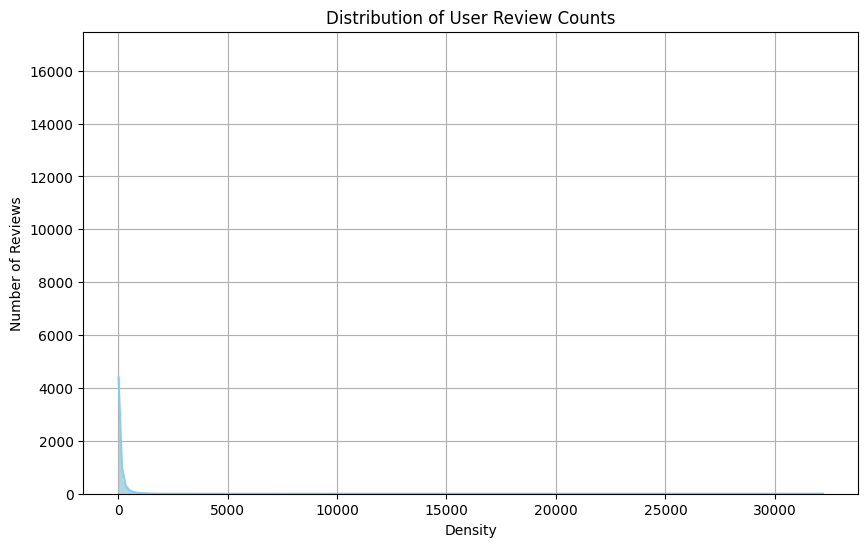

In [20]:
user_reviews_count = movies_rating['userId'].value_counts()
# user_reviews_count.sort_values(ascending=True, inplace=True)

# user_reviews_count.head()
# user_reviews_count.tail()
# print(user_reviews_count)


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_reviews_count, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of User Review Counts')
plt.xlabel('Density')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

#grande parte dos users tem poucas reviews e muitos poucos têm um número bastante elevado
#Esses devem ser professional critics ou spammers

In [ ]:
reviews_summary = movies_rating.groupby(['title'])['rating'].agg(['count', 'mean']).round(1)
reviews_summary.head()

,count,mean
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1,3.0
"""Great Performances"" Cats (1998)",179,2.9
#1 Cheerleader Camp (2010),9,2.1
#Captured (2017),2,3.8
#Female Pleasure (2018),3,3.7


In [ ]:
#number of reviews per movie
tags_movies = pd.merge(tags, movies, on='movieId', how='inner')
tags_movies = tags_movies[['movieId', 'title', 'tag']]


# Group the DataFrame by 'movieId' and 'title', and aggregate the 'tag' column
movie_tag_counts = tags_movies.groupby(['movieId', 'title'])['tag'].agg(['count', lambda x: x.mode().iloc[0]]).reset_index()

# Rename the aggregated columns
movie_tag_counts.columns = ['movieId', 'title', 'tag_count', 'most_common_tag']

print(movie_tag_counts)

# Additional statistics if needed
print("Additional statistics:")
print("Max tag count:", movie_tag_counts['tag_count'].max())
print("Min tag count:", movie_tag_counts['tag_count'].min())
print("Average tag count:", movie_tag_counts['tag_count'].mean())

       movieId                                              title  tag_count  \
0            1                                   Toy Story (1995)        697   
1            2                                     Jumanji (1995)        180   
2            3                            Grumpier Old Men (1995)         29   
3            4                           Waiting to Exhale (1995)         11   
4            5                 Father of the Bride Part II (1995)         24   
...        ...                                                ...        ...   
45246   208813                                      Noelle (2019)          1   
45247   208933                         The Devil's Partner (1961)          2   
45248   209035                              time for sushi (2017)          6   
45249   209037  Our Wonderful Nature - The Common Chameleon (2...          5   
45250   209063                       The Prep School Negro (2012)          9   

       most_common_tag  
0            a

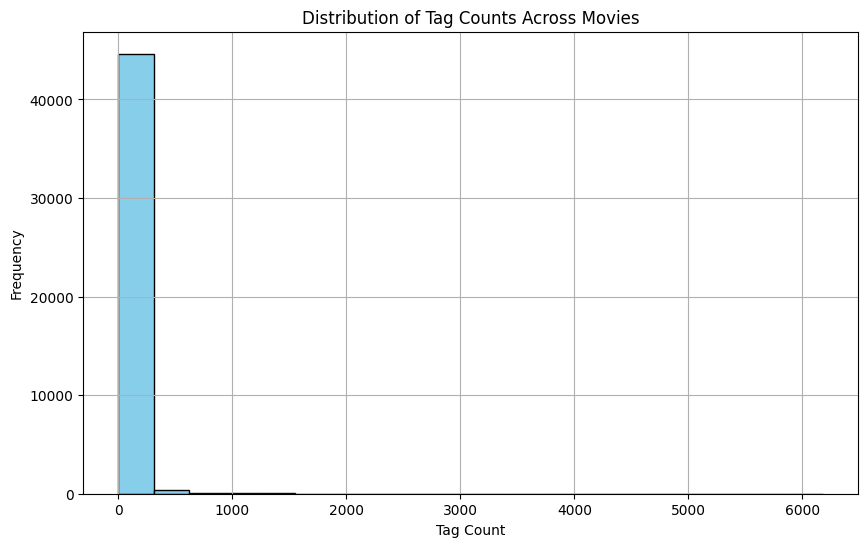

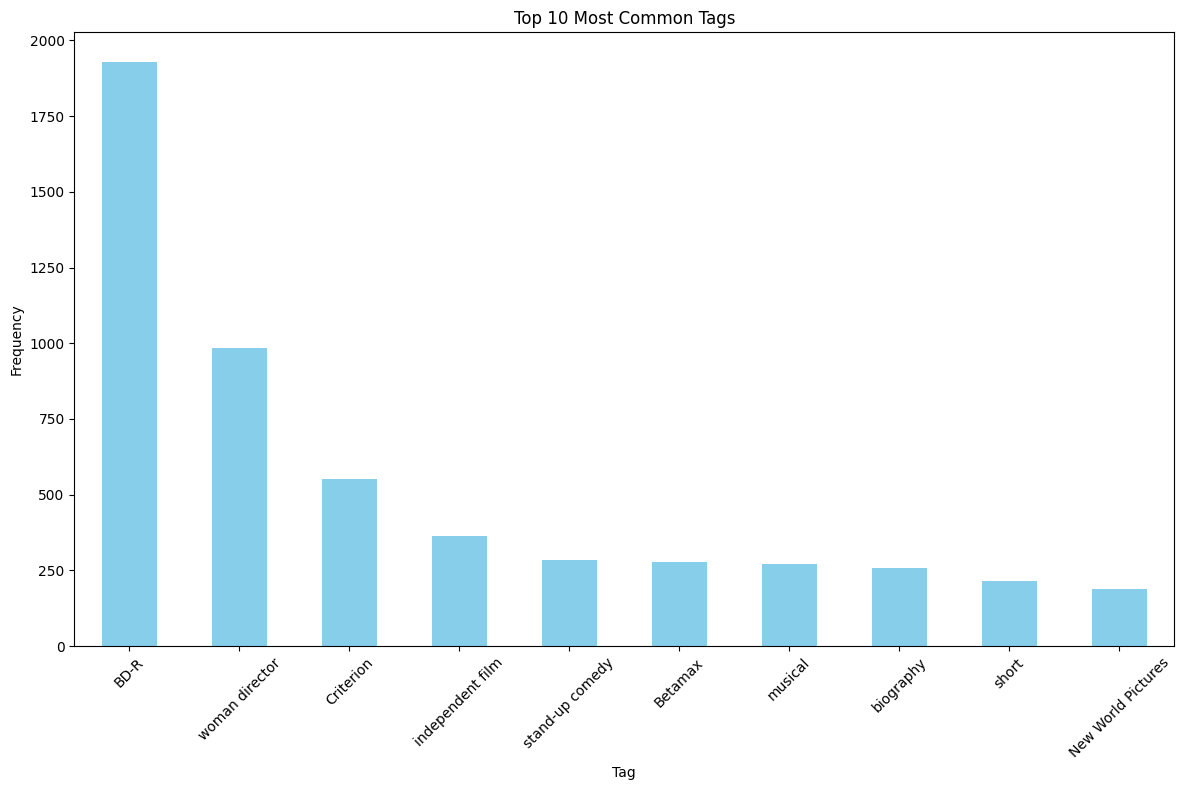

In [ ]:
#Visual analysis 

# Plot histogram of tag counts
plt.figure(figsize=(10, 6))
plt.hist(movie_tag_counts['tag_count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tag Count')
plt.ylabel('Frequency')
plt.title('Distribution of Tag Counts Across Movies')
plt.grid(True)
plt.show()

# Plot bar plot of most common tags
plt.figure(figsize=(12, 8))
top_tags = movie_tag_counts['most_common_tag'].value_counts().head(10)  # Get top 10 most common tags
top_tags.plot(kind='bar', color='skyblue')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Tags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

